# OpenDataScience questionnaire EDA

This notebook serves two main purposes:

- Describes audience statistics of [Open Data Science](https://t.me/opendatascience) telegram channel.
- Shows how Exploratory Data Analysis can be performed.

We will try to present some common techniques to represent data, more over we will try to show how different types of plots or data manipulation can make a plot more interpretable.

This notebook is available at the [github](https://github.com/open-data-science/ods_channel_stats_eda) repo for corrections, addictions and edits. All pull requests are welcome.

## Imports

In [16]:
import sys
from io import StringIO
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from collections import Counter

%matplotlib inline
plt.style.use('seaborn')
from eda_utils import Eda
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 01. Data preparation and general information

In [17]:
eda = Eda()
eda.df.head()

,Timestamp,Country,Timezone,Education,Work,Experience,Age,Sat_update,Sat_material,Interests,How_found,Recommend,Why,"If you want to reach for the editors and to write something, please use the field below:"
0,2020-01-29 13:30:57-03:00,Ukraine,GMT+3,Undergrad,Student + part time remote job,Middle,18-24,"Yes, it's about perfect",It's all ok,#CV #DL #imageprocessing #videolearning;#RL #D...,Forward from a friend,5,All stuff is absolutely brilliant! Thank you f...,NaN
1,2020-01-29 13:31:19-03:00,Russia,GMT+3,Graduate,Employed,Middle,31-42,"Nope, less frequent posting will be all right ...",It's all ok,#RL #DL;#NLP #NLU #conversational #dialoguesys...,"It's been so long time ago, I can't remember (...",4,it's ok,"post some jobs with salary ranges, especially ..."
2,2020-01-29 13:32:48-03:00,Ukraine,GMT+2,PhD,Unemployed,"Novice (Studying courses, active learning)",25-30,"Yes, it's about perfect",Need more specific and complicated materials,#WhereToStart #EntryLevel #Novice #MOOC #Learn...,Telegram channel search,3,NaN,NaN
3,2020-01-29 13:33:27-03:00,Italy,GMT+1,"No degree at all, still learning / self-taught",Student,"Novice (Studying courses, active learning)",18-24,"Yes, it's about perfect",It's all ok,#CV #DL #imageprocessing #videolearning;#RL #D...,Forward from a friend,5,Mainly due to material shared,NaN
4,2020-01-29 13:33:49-03:00,Ukraine,GMT+2,Graduate,Employed,Middle,18-24,"Yes, it's about perfect",It's all ok,#RL #DL;#NLP #NLU #conversational #dialoguesys...,"It's been so long time ago, I can't remember (...",2,It's not super useful actually. Good enough to...,NaN


In [18]:
eda.plot_date_count()

In [19]:
eda.plot_top_countries()

# 02 Work status

Let's then analyze the people's work status.
We process data like we did previously.

In [20]:
eda.plot_feature_count('Work', 'Work status of the audience')

<a name="student"></a>
# 03 Countries and Work Status together

In [21]:
eda.plot_work_country()

So we can conclude that generally the distribution is quite uniform across different countries, except for India where the number of student is slightly greater then the others top 5 countries.

<a name="age"></a>
# 04 Age

In [22]:
eda.plot_age()

<a name="education"></a>
# 05 Education

In [23]:
eda.plot_feature_count('Education', 'Education status of the audience')

<a name="rxperience"></a>
# 06 Experience

In [24]:
eda.plot_feature_count('Experience', 'Experience status of the audience')

D:\Programs\Anaconda3\envs\general\lib\site-packages\seaborn\categorical.py:3692: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



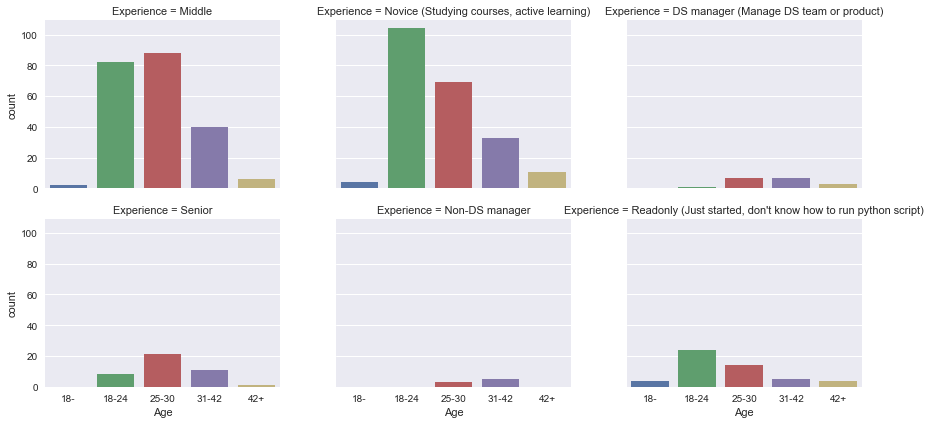

In [25]:
eda.plot_age_experience()

# 07 Is the audience satisfied about the material and update frequency?

One of the main reasons behind the survey is to understand if the audience is satified about the complexity of the material.
To better understand if the audience is satisfied we can (again) use a Violin Plot.

In [30]:
eda.plot_satistaction()

Let's do the same for the update frequency.

In [31]:
eda.plot_feature_count('Sat_update', 'Distribution of satisfaction for update frequency')

# 08 Recommend chance

In [32]:
eda.plot_feature_count('Recommend', 'Distribution of recommend chance')

# 09 Interests

Given the people interests, create a WordCloud to see trends of topics

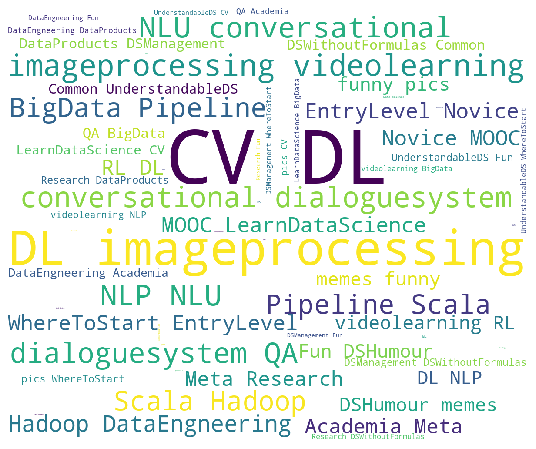

In [34]:
eda.display_wordcloud_image('Interests')

We could also see if particular trends occures in different countries. We could use a WordCloud for each countries or we could select the top-3 topics of countries. Let's try with the hardest way, the latter one.

In [35]:
eda.plot_countries_interests()

From this plot we can see that DeepLearning and image processing are very popular across countries, while in India people demand for beginners stuff.
This can be derived by the fact that, as we saw in **03** and **04** India has the highest percentage of student and people ranging from 18 to 24 years old.

# 10 source

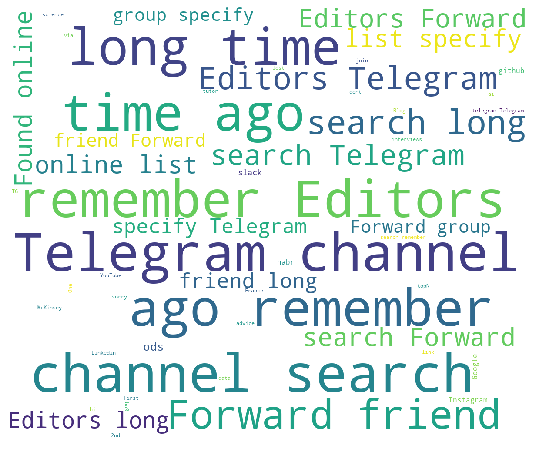

In [36]:
eda.display_wordcloud_image('How_found')